<a href="https://colab.research.google.com/github/gegretel/AML-4/blob/master/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 4**
**Author name:** getong liu

**Purpose:**

performing experiments involving regression using the Beijing PM2.5 Data Set

1.Perform data scrubbing (handle missing data, normalization, scaling, etc.)

2.Perform linear as well as non-linear regression on the dataset 

3.Evaluate the performance of  each model using k-fold cross validation

4.Plot and compare learning curves for all models 

5.Fully discuss which model performs the best and why



# **Fully discuss**

In this project, I uesed linear regression, lasso regression, ridge regression and polynomial regression to deal with the data set. Camparing those regression model, I think we can talk from two ways: K-fold value which is MSE or RMSE value, and learning curves.

First of all, let's look at the K-Fold value. According to the code which is runing later. Linear regression, lasso regression and rigde regression almost have the same MSE and RMSE value, average RMSE is above 80. however polynomial regression get the average RMSE is about 77. which means from this way, polynomial regression is best among those regression.

Secondly, let's look at the learning curve.
From the picture, for all of the model we can know when the training set has only capoule of samples, the model can fit them very well, which is why the curve starts around 6. But when some new samples are added, the degree of fit on the training set becomes unacceptable. This occurs for two reasons. One is because the data contains noise, and the other is that the data is not linear at all. Therefore, as the size of the data increases, the error will continue to increase until it reaches the plateau and stabilizes. After that, continue to add new samples, and the average error of the model will not become better or worse. We continue to look at the performance of the model on the validation set. When training with very few samples, the model cannot be generalized properly, which is why the validation error is very large at first. When the number of training samples increases, the model learns more, and the verification error starts to decrease slowly. However, a straight line cannot fit these data well, so the error will eventually reach a plateau and stabilize, and finally the curve of the training set is very close. 

According to the above imformation, we can say, eventhough polynomial model of the k-fold value hade a better result, since the value is very close, and also the learning curve are similar too, it is hardly to say which one is the best.  if we must choose one from those four accoding to the two ways, it will be polynomial model.

# **Set up**

First, let's make sure this notebook works well in both python 2 and 3,import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

**1.Perform data scrubbing (handle missing data, normalization, scaling, etc.)** 

# **Get the data**

**(1).Loading data**



Firstly, we should load our data here. last few times, these data set can simply load by keras or download from sklearn, however since we will dealing with lot of another data set in the future,which is not simply load anymore, it is better to find out a good way to load data, except using github, I found google colab can load data from google drive, but we need install opam then also install google-drive-ocamlfuse too first here.

secondly, after we install them, we just can simply using 'ls' to list all the file at the drive, and find the file which we need so that we can load it from google drive.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#install opam,then google-drive-ocamlfuse
!apt-get install opam
!opam init
!opam update
!opam install depext
!opam depext google-drive-ocamlfuse
!opam install google-drive-ocamlfuse
#give permission
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!/root/.opam/system/bin/google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | /root/.opam/system/bin/google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
# choose Google Drive as root directory，named as drive
!mkdir -p drive
!/root/.opam/system/bin/google-drive-ocamlfuse drive

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aspcud camlp4 clasp darcs file gringo ledit libcamlp4-ocaml-dev
  libfindlib-ocaml libfindlib-ocaml-dev liblua5.3-0 libmagic-mgc libmagic1
  mercurial mercurial-common ocaml ocaml-base ocaml-base-nox
  ocaml-compiler-libs ocaml-findlib ocaml-interp ocaml-nox opam-docs
Suggested packages:
  kdiff3 | kdiff3-qt | kompare | meld | tkcvs | mgdiff qct python-mysqldb
  python-openssl python-pygments ocaml-doc tuareg-mode | ocaml-mode
The following NEW packages will be installed:
  aspcud camlp4 clasp darcs file gringo ledit libcamlp4-ocaml-dev
  libfindlib-ocaml libfindlib-ocaml-dev liblua5.3-0 libmagic-mgc libmagic1
  mercurial mercurial-common ocaml ocaml-base ocaml-base-nox
  ocaml-compiler-libs ocaml-findlib

In [0]:

%ls /content

adc.json  drive/  sample_data/


In [0]:

%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
%ls

'AMLASSIGN3 (1).ipynb'   PRSA_data_2010.1.1-2014.12.31.csv   Untitled0.ipynb
'AMLASSIGN3 (2).ipynb'  'svm (1).ipynb'                      Untitled1.ipynb
 AMLASSIGN3.ipynb       'svm (2).ipynb'                      Untitled.ipynb
'Copy of Untitled'       svm.ipynb
 project2.ipynb         'SVM PCA RandomForest.ipynb'


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**(2).Imput all the necessary package**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge



In [0]:
os.chdir("/content/gdrive/My Drive/")

**(3).show the data information by column, and show the data's type imformation, also plot each data's picture.**

In [0]:
df=pd.read_csv("./Colab Notebooks/PRSA_data_2010.1.1-2014.12.31.csv")
df.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [0]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


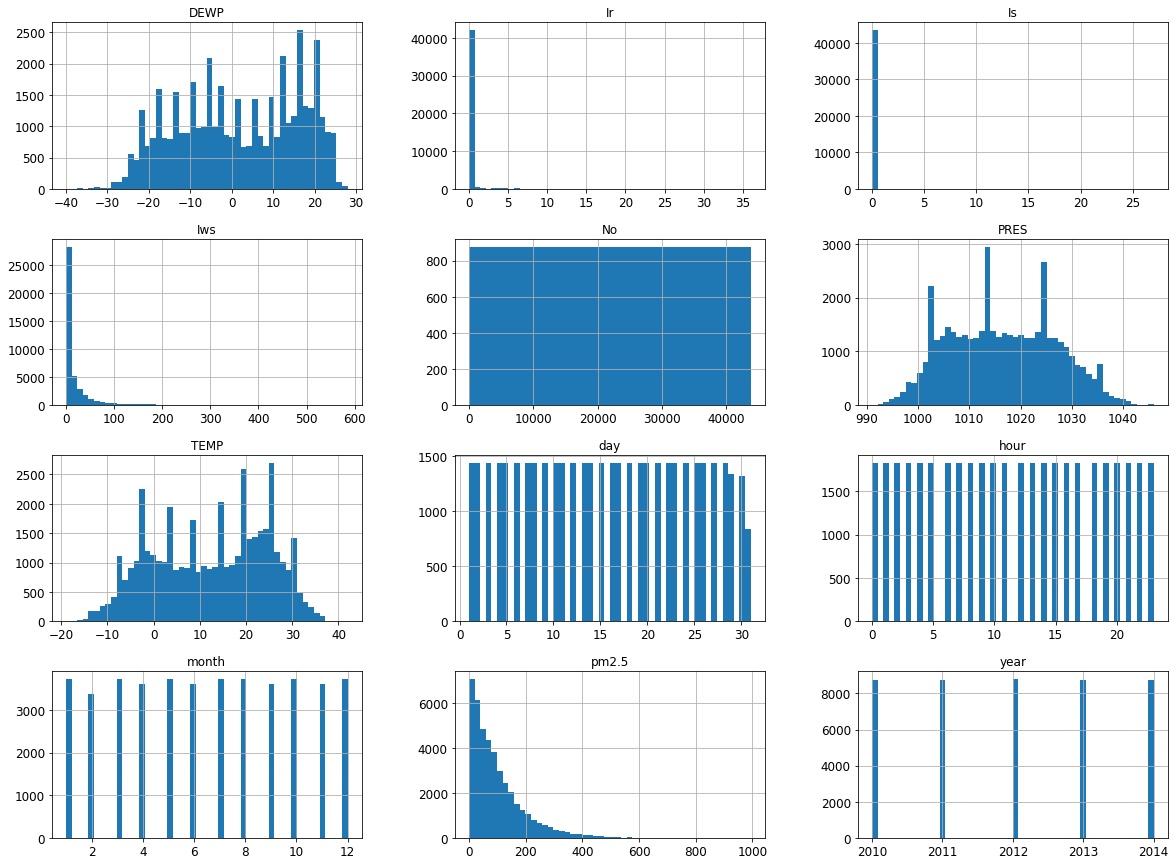

In [0]:
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.show()

# **Prepare the data for Machine Learning algorithms**

**now, for machine learning algorithms, we need hadlding all the data.**

Firstly, sometimes due to data mising, there are some NA value at the data set, which will impact our result, so we need check where and how much missing data we have. 

Secondly,after we using 'df.isna().sum()', it shows that only 2067 missing data of pm 2.5, comparing with the whole dataset which have 43824 data, it is very small, so I choosed drop all the NA data.(but I also used anther way which is add median value inside NA place, however, the results shows dropping NA data will get higher predict value).

thirdly, because if we need do algorithms, we need to change all the column's value to be number, however cbwd is not number here, so I replaced these value by number.

In [0]:
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [0]:
df.dropna(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
No       41757 non-null int64
year     41757 non-null int64
month    41757 non-null int64
day      41757 non-null int64
hour     41757 non-null int64
pm2.5    41757 non-null float64
DEWP     41757 non-null int64
TEMP     41757 non-null float64
PRES     41757 non-null float64
cbwd     41757 non-null object
Iws      41757 non-null float64
Is       41757 non-null int64
Ir       41757 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [0]:
df_word = df[['cbwd']]
df_word.head(10)

,cbwd
24,SE
25,SE
26,SE
27,SE
28,SE
29,SE
30,SE
31,SE
32,SE
33,SE


In [0]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

**check whether encdoe or not**

In [0]:
ordinal_encoder = OrdinalEncoder()
df_encoded = ordinal_encoder.fit_transform(df_word)
df_encoded[:50]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [0]:
ordinal_encoder.categories_

[array(['NE', 'NW', 'SE', 'cv'], dtype=object)]

In [0]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

**replace the oraginal data by encode data**

In [0]:
df = df.assign(cbwd= df_encoded)


In [0]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,2.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,2.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,2.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,2.0,6.25,2,0


In [0]:
#median = df["pm2.5"].median()
#df["pm2.5"].fillna(median, inplace=True) 


In [0]:
#df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,72.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2,2010,1,1,1,72.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,3,2010,1,1,2,72.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,4,2010,1,1,3,72.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,5,2010,1,1,4,72.0,-20,-12.0,1018.0,1.0,12.97,0,0


**Now we are ready to using linear as well as non-linear regression on the dataset, at the same time we can do normalization and scaling.**

**2.Perform linear as well as non-linear regression on the dataset**

**3.Evaluate the performance of  each model using k-fold cross validation**

# **linear regression**

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant call the bias term. the most common performance measure of a regression model is the RMSE.

In this part, uesed linear regression(by using linear model,  also lasso and ridge regression) to measure these data.

Firstly, use corr_matrix to find the reltation between pm2.5 with other column.
and drop off the irrelevant data.

Sencondly, use the linear model to get the MSE, during this time we find if we scaling the data, it will improve the result. Then we can plot the model's predictions.

Thirdly, using k-fold to get the RMSE.

In [0]:
corr_matrix = df.corr()

In [0]:
corr_matrix["pm2.5"].sort_values(ascending=False)

pm2.5    1.000000
cbwd     0.197150
DEWP     0.171423
day      0.082788
Is       0.019266
year    -0.014690
No      -0.017706
hour    -0.023116
month   -0.024069
PRES    -0.047282
Ir      -0.051369
TEMP    -0.090534
Iws     -0.247784
Name: pm2.5, dtype: float64

In [0]:
y = df['pm2.5']
X = df.drop(columns=['pm2.5','day','year','No','hour','month'])
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

print(X_train.shape, y_train.shape)


(29229, 7) (29229,)


In [0]:
linear_model.LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [0]:
linear=linear_model.LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_train,y_train)
linear.score(X_test,y_test)


0.24996723763427142

In [0]:
linear.coef_
linear.intercept_

1622.894970177442

**Feature scaling is performed before learning to ensure that these features have similar scales, which will help the gradient descent algorithm to converge faster.**

In [0]:
# data scaling, improve the speed to dealing with the data

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
 
ss.fit(X_test)

X_test = ss.transform(X_test)

linear.fit(X_train,y_train)
linear.score(X_train,y_train)
linear.score(X_test,y_test)

0.25002517933931534

In [0]:
y_hat=linear.predict(X_train)
y_pre=linear.predict(X_test)
fmse=(y_pre-y_test).T.dot(y_pre-y_test)/len(y_test)
mse=(y_hat-y_train).T.dot(y_hat-y_train)/len(y_train)


In [0]:
fmse

6410.867356985548

The mean square error in mathematical statistics refers to the expected value of the square of the difference between the parameter estimate and the parameter value, and is recorded as MSE. MSE is a more convenient method to measure the "average error". MSE can evaluate the degree of change in data. The smaller the value of MSE, the better the accuracy of the prediction model in describing the experimental data.

In [0]:
mse

6312.165236504724

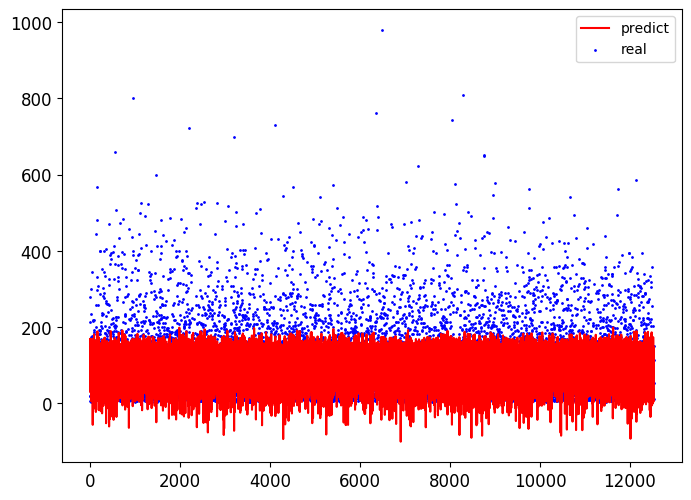

In [0]:
plt.rcParams['savefig.dpi']=300 
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.figsize']=(8.0,6.0)
plt.figure()
plt.scatter(list(range(len(y_pre))),y_test,label='real',color='b',s=1)
plt.plot(list(range(len(y_pre))),y_pre,label='predict',color='r')
plt.legend()
plt.show()


**k-fold cross validation for linear regression**

firstly, using k-fold to get mse

secondly, fixing the sign of MSE scores

thirdly,convert from MSE to RMSE

calculate the average RMSE

In [0]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(linear, X_test, y_test, scoring='neg_mean_squared_error', cv=cv)
scores

array([-6610.84765487, -6263.31373388, -6815.48652666, -6894.99137959,
       -5698.09040288, -6518.5891993 , -6489.59418911, -6699.22204122,
       -5560.58802816, -6577.51346584])

In [0]:
mse_scores = -scores
print(mse_scores)

[6610.84765487 6263.31373388 6815.48652666 6894.99137959 5698.09040288
 6518.5891993  6489.59418911 6699.22204122 5560.58802816 6577.51346584]


In [0]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[81.30711934 79.14110016 82.55595997 83.0360848  75.48569668 80.7377805
 80.55801753 81.84877544 74.56935046 81.10187091]
80.03417557913403


**Ridge regression**

In [0]:
from sklearn.linear_model import Ridge,RidgeCV

lambdas = np.logspace(-5,2,200)
ridge_cv = RidgeCV(alphas=lambdas,normalize=True,scoring="neg_mean_squared_error",cv=10)
ridge_cv.fit(X_train,y_train)
ridge_cv.alpha_



model=Ridge(alpha=ridge_cv.alpha_,normalize=True)
Ridge_model=model.fit(X_train,y_train)
ridge_pre = model.predict(X_test)

mean_squared_error(y_test,ridge_pre)


r2_score(y_test,ridge_pre)


0.250024796466054

**K-fold for ridge regression**


firstly, using k-fold to get mse

secondly, fixing the sign of MSE scores

thirdly,convert from MSE to RMSE

calculate the average RMSE

In [0]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(ridge_cv_model, X_test, y_test, scoring='neg_mean_squared_error', cv=cv)
scores

array([-6611.10750237, -6263.32926832, -6815.60522653, -6895.08429177,
       -5697.96711527, -6518.38804028, -6489.57301114, -6699.35017439,
       -5560.41130737, -6577.50940247])

In [0]:
mse_scores = -scores
print(mse_scores)

[6611.10750237 6263.32926832 6815.60522653 6895.08429177 5697.96711527
 6518.38804028 6489.57301114 6699.35017439 5560.41130737 6577.50940247]


In [0]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[81.30871726 79.1411983  82.55667887 83.03664427 75.48488004 80.73653473
 80.55788609 81.84955818 74.56816551 81.10184586]
80.03421091197548


**lasso regression**

In [0]:
from sklearn.linear_model import Lasso,LassoCV


Lambdas=np.logspace(-10,2,2000)
lasso_cv=LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
lasso_cv.fit(X_train,y_train)
lasso_cv.alpha_


lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso_model=lasso.fit(X_train,y_train)
lasso_pre=lasso.predict(X_test)
mean_squared_error(y_test,lasso_pre)


r2_score(y_test,lasso_pre)


0.25002265063860507

**K-fold for lasso regression**


firstly, using k-fold to get mse

secondly, fixing the sign of MSE scores

thirdly,convert from MSE to RMSE

calculate the average RMSE

In [0]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(ridge_cv_model, X_test, y_test, scoring='neg_mean_squared_error', cv=cv)
scores

array([-6611.10750237, -6263.32926832, -6815.60522653, -6895.08429177,
       -5697.96711527, -6518.38804028, -6489.57301114, -6699.35017439,
       -5560.41130737, -6577.50940247])

In [0]:
mse_scores = -scores
print(mse_scores)

[6611.10750237 6263.32926832 6815.60522653 6895.08429177 5697.96711527
 6518.38804028 6489.57301114 6699.35017439 5560.41130737 6577.50940247]


In [0]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[81.30871726 79.1411983  82.55667887 83.03664427 75.48488004 80.73653473
 80.55788609 81.84955818 74.56816551 81.10184586]
80.03421091197548


# **non-linear regression**

Polynomial regression

firstly, lets plot the test of pm data picture, and observe whether we can use polynomial regression or not.

secondly, let's use Scikit-Learns's Poly nomialFeatures class to transform our training data, adding the squre of each features in the training set as new features. 

thridly, get the MSE for poly regression, and then plot the prediction pictures.

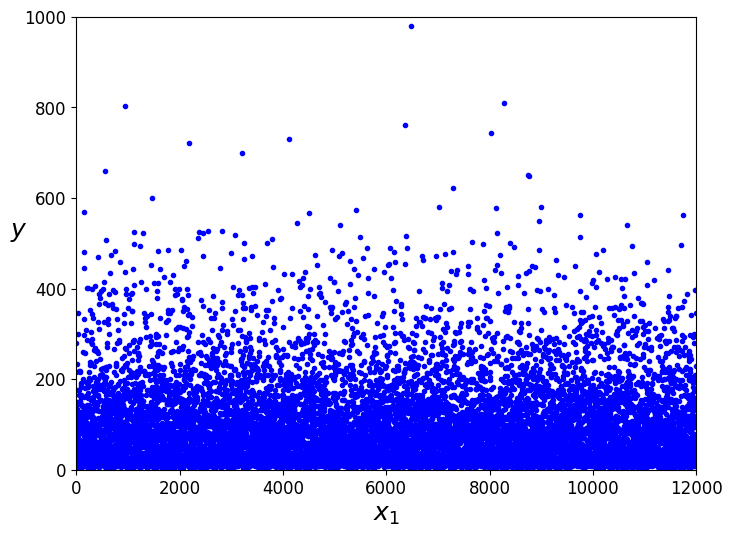

In [0]:
plt.plot(list(range(len(y_test))), y_test, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 12000, 0, 1000])

plt.show()

In [0]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_train[0]

array([-1.08772482, -1.50844197,  1.12083643, -0.71025627, -0.46336544,
       -0.07191939, -0.13587022])

**X_poly now contains the original feature of X plus the squre of this features. now we can fit a LinearRegression model to this extended training data.**

In [0]:
X_poly[0]

array([-1.08772482, -1.50844197,  1.12083643, -0.71025627, -0.46336544,
       -0.07191939, -0.13587022,  1.18314529,  1.64076978, -1.21916161,
        0.77256338,  0.5040141 ,  0.07822851,  0.14778942,  2.27539718,
       -1.69071672,  1.07138037,  0.69895988,  0.10848623,  0.20495235,
        1.25627431, -0.7960811 , -0.51935687, -0.08060987, -0.1522883 ,
        0.50446397,  0.32910821,  0.0510812 ,  0.09650268,  0.21470754,
        0.03332496,  0.06295757,  0.0051724 ,  0.0097717 ,  0.01846072])

In [0]:
lin_reg = LinearRegression(normalize=True)
lin_reg_model=lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(170344083986.80646,
 array([ 7.37655030e+01, -8.19454588e+01, -9.85828261e+00,  1.59707199e+01,
        -1.39799317e+01,  2.36854177e+12,  1.25372638e+12,  2.09731370e+01,
        -5.85033390e+01,  1.31312038e+00,  3.05165119e-01, -1.07018891e+01,
         8.72674731e+00, -6.68038778e-01,  3.55854699e+01,  2.74983675e+00,
         1.64553080e+00,  1.56808380e+01, -2.72055887e-01,  5.22185396e+00,
        -6.95650408e+00,  5.60159503e-01,  6.18420377e+00,  1.11670046e+00,
         3.41290725e-01, -1.78573266e+00,  1.69051723e+01, -1.18982525e+00,
        -4.83094275e-01,  2.56460303e+00,  8.23079988e-01,  2.11076307e+00,
         2.58009085e-01,  1.74323829e+13,  6.21626936e-01]))

In [0]:
X_new_poly = poly_features.fit_transform(X_test)
X_new_poly[0]


array([-0.61601685, -1.60049051,  0.34903118, -0.70106467, -0.15639275,
       -0.06900519, -0.14099373,  0.37947676,  0.98592912, -0.21500909,
        0.43186765,  0.09634057,  0.04250836,  0.08685452,  2.56156986,
       -0.55862109,  1.12204734,  0.25030512,  0.11044215,  0.22565913,
        0.12182276, -0.24469343, -0.05458595, -0.02408496, -0.04921121,
        0.49149167,  0.10964143,  0.0483771 ,  0.09884573,  0.02445869,
        0.01079191,  0.0220504 ,  0.00476172,  0.0097293 ,  0.01987923])

In [0]:
X_test[0]

array([-0.61601685, -1.60049051,  0.34903118, -0.70106467, -0.15639275,
       -0.06900519, -0.14099373])

In [0]:
y_hat=lin_reg.predict(X_poly)
y_pre=lin_reg.predict(X_new_poly )
fmse=(y_pre-y_test).T.dot(y_pre-y_test)/len(y_test)
mse=(y_hat-y_train).T.dot(y_hat-y_train)/len(y_train)

In [0]:
fmse

5944.725513152999

In [0]:
mse

5809.422279976005

In [0]:
lin_reg.fit(X_new_poly , y_test)
lin_reg.intercept_, lin_reg.coef_

(100.52996001133839,
 array([ 69.7490905 , -81.48910535, -12.50757097,  17.94120959,
        -13.95353778,   0.17148735, -14.83934944,  17.96318033,
        -54.27573804,  -2.47986438,   2.007339  , -11.61188841,
          7.8816051 ,  -4.97127418,  37.10450729,  11.75900096,
          0.84642126,  17.84053741,   1.76890619,   6.97418929,
         -3.14953152,   3.40648874,   7.61505773,  -1.87934885,
          0.48098899,  -2.41547057,  18.68147937,  -1.22304536,
         -0.35071059,   2.56641828,  -0.202123  ,   1.81851741,
          0.25787873,   0.99981348,   0.6646511 ]))

No handles with labels found to put in legend.


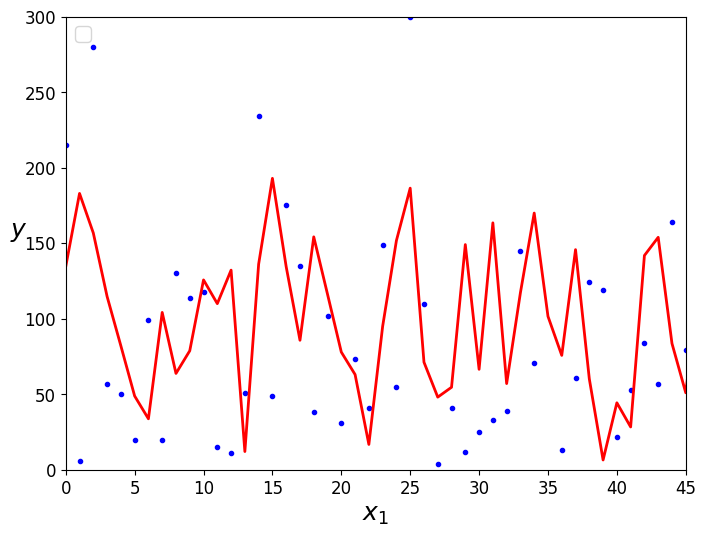

In [0]:
y_pre=lin_reg.predict(X_poly)
plt.plot(list(range(len(y_test))), y_test, "b.")
plt.plot( list(range(len(y_pre))),y_pre, "r-", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 45, 0, 300])

plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = linear_model.LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new_poly)
    plt.plot(list(range(len(y_newbig))), y_newbig, style, label=str(degree), linewidth=width)

plt.plot(list(range(len(y_test))), y_test, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 12000, 0, 1000])

plt.show()

KeyboardInterrupt: ignored

**above code runing 2 hours can not show picture**

**k-fold cross validation for polynomial regression**

firstly, using k-fold to get mse

secondly, fixing the sign of MSE scores

thirdly,convert from MSE to RMSE
calculate the average RMSE

In [0]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lin_reg, X_new_poly, y_test, scoring='neg_mean_squared_error', cv=cv)
scores

array([-6125.83247532, -5783.74339408, -6277.88259285, -6300.84876303,
       -5325.41106387, -6126.22304944, -6095.68008903, -6162.59655695,
       -5195.71121753, -6114.05150467])

In [0]:
mse_scores = -scores
print(mse_scores)

[6125.83247532 5783.74339408 6277.88259285 6300.84876303 5325.41106387
 6126.22304944 6095.68008903 6162.59655695 5195.71121753 6114.05150467]


In [0]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[78.26769752 76.05092632 79.23309026 79.37788586 72.97541411 78.2701926
 78.07483646 78.50220734 72.08128202 78.19240056]
77.10259330442963


**4.Plot and compare learning curves for all models**

# **learning curves for all models** 

learning curves plots model's performance on the training set and the validation set as a function of the training set size. to get the plot, simply train the model seveal time on different sized subsets of the training set.

the folloing code defines a function that plots the learning curves of a model given some training data:

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 

**let's let at the learning curves of the linear regression model**

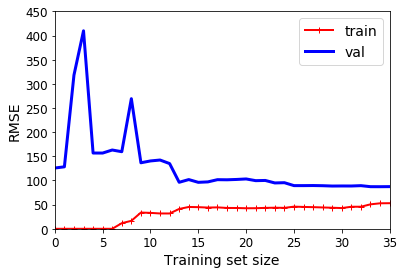

In [0]:

plot_learning_curves(linear, X, y)
plt.axis([0, 35, 0, 450])                         # not shown in the book
plt.show()

**let's let at the learning curves of the polynomial regression model**

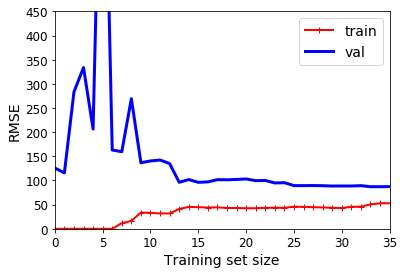

In [0]:
plot_learning_curves(lin_reg_model, X, y)
plt.axis([0, 35, 0, 450])                         # not shown in the book
plt.show()

**let's let at the learning curves of the lasso regression model**

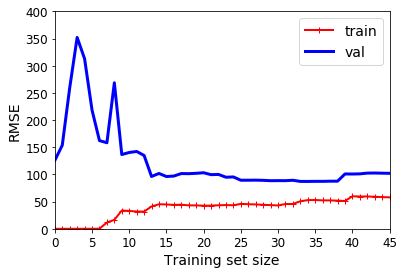

In [0]:
plot_learning_curves(lasso_model, X, y)
plt.axis([0, 45, 0, 400])             
plt.show()

**let's let at the learning curves of the Ridge regression model**

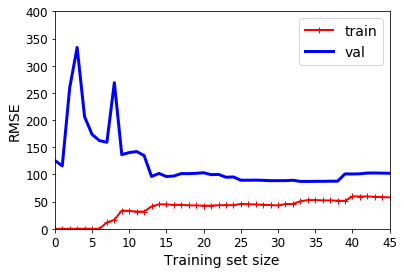

In [0]:
plot_learning_curves(Ridge_model, X, y)
plt.axis([0, 45, 0, 400])             
plt.show()